In [1]:
#https://albumentations.ai/docs/api_reference/augmentations/transforms/

In [2]:
import numpy as np
import os
import cv2
import random
from random import randint

from matplotlib import pyplot as plt
import albumentations as A
import numpy as np
import tensorflow as tf

import random
import cv2
from matplotlib import pyplot as plt
import albumentations as A
import numpy as np
    

In [1]:
def view_transform(image):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(image)
    
def display_test(display_list):
    plt.figure(figsize=(10, 10))

    title = ['Input Image', 'True mask', 'Predicted mask','Filtered mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        #plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))

        plt.axis('off')
    plt.show()
    
def create_augmentation_pipeline():

    oneOf0 = [A.FancyPCA(alpha=0.45),A.RGBShift (r_shift_limit=30, g_shift_limit=30, b_shift_limit=30)]
    oneOf1 = [A.RandomBrightness(limit=0.45),A.GaussNoise(),A.RandomGamma(),A.CLAHE()]#,A.CLAHE(),A.FancyPCA(alpha=0.4),A.RandomSunFlare()]
    oneOf2 = [] #A.ElasticTransform(alpha = 50,sigma = 50 * 0.05,alpha_affine = 50 * 0.03),A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45)
    oneOf3 = []#,A.RandomCrop(150, 150),A.CoarseDropout(max_holes=5, max_height=60, max_width=60,mask_fill_value=0)
    oneOf4 = []#A.GridDistortion()
    
    aug_block = [A.RandomRotate90(p=1), A.OneOf(oneOf0,p = 1), A.OneOf(oneOf1,p = 1)]#, A.OneOf(oneOf2,p = 0.8),A.OneOf(oneOf3,p = 0.4),A.OneOf(oneOf4,p=0.5)]
    
    augmentation_pipeline = A.Compose(aug_block, p = 1)
    
    return augmentation_pipeline

In [9]:
p1 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/ok/UNIMIB2016 Food Database/test/food_images/images/20151127_125751.jpg'
p2 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/ok/UNIMIB2016 Food Database/test/food_masks/images/20151127_125751.png'

figure1 = cv2.imread(p1)
figure1 = cv2.resize(figure1,(128,128))
figure2 = cv2.imread(p2)
figure2 = cv2.resize(figure2,(128,128))
figure1 = cv2.cvtColor(figure1, cv2.COLOR_BGR2RGB)

aug_pipeline = create_augmentation_pipeline()

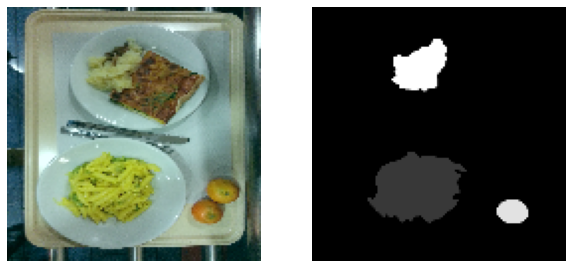

In [10]:
aug_pipeline = create_augmentation_pipeline()
augmented = aug_pipeline(image=figure1, mask=figure2)
image_i, label_i= augmented['image'], augmented['mask']
#view_transform(image_i),view_transform(label_i)

display_test([image_i,label_i])